In [ ]:
import py3dep
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pynhd as nhd
import flopy
import geopandas as gpd
from pynhd import NLDI, NHDPlusHR, WaterData
import contextily as ctx
import numpy as np

from flopy.utils import Raster
import os

import geopandas as gpd

In [ ]:
from xrspatial import zonal_stats
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show
import rasterio
import xarray as xr

use xarray zonal stats to calculate minimum elelvation for grid cells


https://pygis.io/docs/e_raster_rasterize.html

In [ ]:
import basic

In [ ]:
m = basic.load_model()

In [ ]:
x = m.modelgrid.get_xcellcenters_for_layer(1)
y = m.modelgrid.get_ycellcenters_for_layer(1)


In [ ]:
mgrid = m.modelgrid

# use the opentopography output_hb.tif version of the lidar output


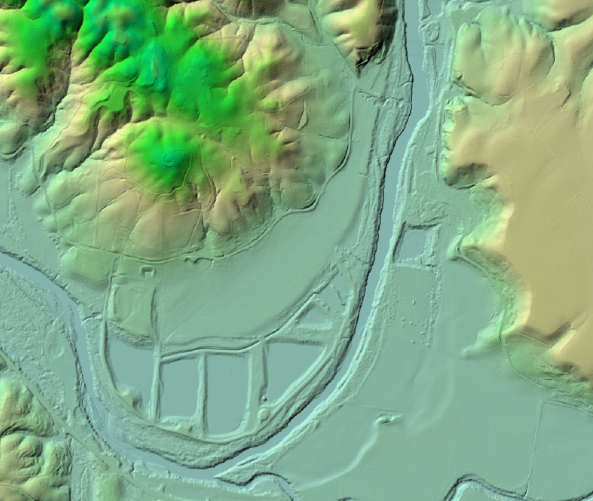

In [ ]:
import whiteboxgui

In [ ]:
whiteboxgui.show()

In [ ]:

# dst_crs = 'EPSG:2226'
# raster_ws = os.path.join("GIS", "DEMV2")
# # raster_name = "output_be_DTM.tif"
# # raster_name = "output_be_DTM_whitebox_filldep.tif"
# raster_name = "output_hb.tif"
# rast = os.path.join(raster_ws, raster_name)
# rio = Raster.load(rast)





# arr = rio.get_array(1)
# idx = np.isfinite(arr)

# vmin, vmax = arr[idx].min(), arr[idx].max()
# vmin, vmax



# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(1, 1, 1, aspect="equal")

# ax = rio.plot(ax=ax, vmin=25, vmax=50)
# plt.colorbar(ax.images[0], shrink=0.7);





# rio.bounds

# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(1, 1, 1, aspect="equal")

# ax = rio.plot(ax=ax, vmin=vmin, vmax=vmax)
# plt.colorbar(ax.images[0], shrink=0.7)
# pmv = flopy.plot.PlotMapView(modelgrid=m.modelgrid)
# pmv.plot_grid(ax=ax, lw=0.5, color="black");







# https://pygis.io/docs/e_raster_rasterize.html





# grid = gpd.read_file("GIS/grid.shp")
# # Get list of geometries for all features in vector file
# # geom = [shapes for shapes in grid.geometry]
# # # create tuples of geometry, value pairs, where value is the attribute value you want to burn
# # geom_value = ((geom,value) for geom, value in zip(vector.geometry, vector['id']))
# geom = list((g.geometry, index) for index,g in grid.iterrows())
# # Read in vector
# vector = grid

# # Open  raster
# raster = rasterio.open(rast)





# # Rasterize vector using the shape and coordinate system of the raster
# rasterized_grid = features.rasterize(geom,
#                                 out_shape = raster.shape,
#                                 fill = 0,
#                                 out = None,
#                                 transform = raster.transform,
#                                 all_touched = True,
#                                 default_value = 1,
#                                 dtype = None)

# # Plot raster
# fig, ax = plt.subplots(1, figsize = (10, 10))
# show(rasterized_grid, ax = ax)
# plt.gca().invert_yaxis()



# data = raster.read()[0,:,:]
# data.shape

# rasterized_grid.shape



# xr_rast_grid = xr.DataArray(rasterized_grid)
# xr_rast = xr.DataArray(data)

# zone = zonal_stats(xr_rast_grid, xr_rast)

# zone.head()

# zone_ras = zone.loc[:,'min'].values.reshape((m.dis.nrow, m.dis.ncol))

# zone_ras = np.ma.array(zone_ras, mask = m.bas6.ibound.array[0]==0)

In [ ]:
def get_model_raster(file, version = 'min'):
    
    # dst_crs = 'EPSG:2226'
    # raster_ws = os.path.join("GIS", "DEMV2")
    # raster_name = "output_be_DTM.tif"
    # raster_name = "output_be_DTM_whitebox_filldep.tif"
    # raster_name = "output_hb.tif"
    # rast = os.path.join(raster_ws, raster_name)
    rio = Raster.load(file)
    
    arr = rio.get_array(1)
    idx = np.isfinite(arr)

    vmin, vmax = arr[idx].min(), arr[idx].max()
    vmin, vmax
    
    
    grid = gpd.read_file("GIS/grid.shp")
    # Get list of geometries for all features in vector file
    # geom = [shapes for shapes in grid.geometry]
    # # create tuples of geometry, value pairs, where value is the attribute value you want to burn
    # geom_value = ((geom,value) for geom, value in zip(vector.geometry, vector['id']))
    geom = list((g.geometry, index) for index,g in grid.iterrows())
    # Read in vector
    vector = grid

    # Open  raster
    # raster = rasterio.open(rast)
    raster = rasterio.open(file)
    
    # Rasterize vector using the shape and coordinate system of the raster
    rasterized_grid = features.rasterize(geom,
                                    out_shape = raster.shape,
                                    fill = 0,
                                    out = None,
                                    transform = raster.transform,
                                    all_touched = True,
                                    default_value = 1,
                                    dtype = None)

    # # Plot raster
    # fig, ax = plt.subplots(1, figsize = (10, 10))
    # show(rasterized_grid, ax = ax)
    # plt.gca().invert_yaxis()
    
    data = raster.read()[0,:,:]
    xr_rast_grid = xr.DataArray(rasterized_grid)
    xr_rast = xr.DataArray(data)
    
    
    zone = zonal_stats(xr_rast_grid, xr_rast)
    
    mod_array = zone.loc[:,version].values.reshape((m.dis.nrow, m.dis.ncol))

    mod_array = np.ma.array(mod_array, mask = m.bas6.ibound.array[0]==0)
    
    return mod_array


raster_ws = os.path.join("GIS", "DEMV2")

raster_name = "output_hb.tif"
rast_file = os.path.join(raster_ws, raster_name)
zone_ras_raw = get_model_raster(rast_file)

raster_name = "output_hb_whitebox_fill.tif"
rast_file = os.path.join(raster_ws, raster_name)
zone_ras_filled = get_model_raster(rast_file)

In [ ]:
np.savetxt("GIS/lay_1_top_filled_ponds.csv", zone_ras_filled, delimiter=",", fmt ="%.1f")
np.savetxt("RR_2022/inputs/lay_1_top_filled_ponds.csv", zone_ras_filled, delimiter=",", fmt ="%.1f")

np.savetxt("GIS/lay_1_top.csv", zone_ras_raw, delimiter=",", fmt ="%.1f")
np.savetxt("RR_2022/inputs/lay_1_top.csv", zone_ras_raw, delimiter=",", fmt ="%.1f")

In [ ]:
# zone_var = zone.loc[:,'std'].values.reshape((m.dis.nrow, m.dis.ncol))

# zone_var = np.ma.array(zone_var, mask = m.bas6.ibound.array[0]==0)
# # now to visualize using flopy and matplotlib
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(1, 1, 1, aspect="equal")

# pmv = flopy.plot.PlotMapView(modelgrid=m.modelgrid, ax=ax)
# ax = pmv.plot_array(
#     zone_var, masked_values=rio.nodatavals, cmap = 'terrain'
# )

# plt.colorbar(ax, shrink=0.7);
# plt.title('Model Cell Variance')

In [ ]:
import cartopy.crs as ccrs
import contextily as ctx 

In [ ]:
# now to visualize using flopy and matplotlib
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 3, 1, aspect="equal", projection = ccrs.epsg(2226))
# zone_ras = np.ma.array(zone_ras_raw, mask = m.bas6.ibound.array[0]==0)
pmv = flopy.plot.PlotMapView(modelgrid=m.modelgrid, ax=ax)
cr = pmv.plot_array(
    zone_ras_raw, masked_values=zone_ras_raw.mask, cmap = 'terrain',vmin = 20,vmax = 400
)
plt.colorbar(cr, shrink=0.2);
ax.set_title('Model Top (raw data)')
ctx.add_basemap(ax = ax, crs = 2226)

ax = fig.add_subplot(1, 3, 2, aspect="equal" , projection = ccrs.epsg(2226))
# zone_ras = np.ma.array(zone_ras_raw, mask = m.bas6.ibound.array[0]==0)
pmv = flopy.plot.PlotMapView(modelgrid=m.modelgrid, ax=ax)
cr = pmv.plot_array(
    zone_ras_filled, masked_values=zone_ras_filled.mask, cmap = 'terrain',vmin = 20,vmax = 400
)
plt.colorbar(cr, shrink=0.2);
ax.set_title('Model Top (hydro-filled)')
ctx.add_basemap(ax = ax, crs = 2226)

ax = fig.add_subplot(1, 3, 3, aspect="equal" , projection = ccrs.epsg(2226))
# zone_ras = np.ma.array(zone_ras_raw, mask = m.bas6.ibound.array[0]==0)
pmv = flopy.plot.PlotMapView(modelgrid=m.modelgrid, ax=ax)
cr = pmv.plot_array(
    zone_ras_filled-zone_ras_raw, masked_values=zone_ras_filled.mask, cmap = 'viridis',vmin = -10, vmax = 50
)
ax.set_title('hydro-filled minus raw')
ctx.add_basemap(ax = ax, crs = 2226)

plt.colorbar(cr, shrink=0.2);

In [ ]:


# now to visualize using flopy and matplotlib
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
zone_ras = np.ma.array(zone_ras_filled, mask = m.bas6.ibound.array[0]==0)
pmv = flopy.plot.PlotMapView(modelgrid=m.modelgrid, ax=ax)
cr = pmv.plot_array(
    zone_ras, masked_values=zone_ras_filled.mask, cmap = 'terrain',vmax = 400
)

plt.colorbar(cr, shrink=0.7);

# sfr.plot(ax = ax, zorder = 100, edgecolor = 'k')


In [ ]:
# now to visualize using flopy and matplotlib
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
zone_ras = np.ma.array(zone_ras_raw, mask = m.bas6.ibound.array[0]==0)
pmv = flopy.plot.PlotMapView(modelgrid=m.modelgrid, ax=ax)
cr = pmv.plot_array(
    zone_ras, masked_values=zone_ras_filled.mask, cmap = 'terrain',vmax = 400
)

plt.colorbar(cr, shrink=0.7);

# sfr.plot(ax = ax, zorder = 100, edgecolor = 'k')

In [ ]:
sfr_file = 'GIS/nhd_hr_demo_sfr_cells.shp'

sfr = gpd.read_file(sfr_file)

In [ ]:
sfr.explore()

In [ ]:
sfr.plot()

In [ ]:
import conda_scripts.arich_functions as af

In [ ]:
af.array2rc(zone_ras, 'elevation')

In [ ]:
existing = np.loadtxt("RR_2022/inputs/lay_1_top.csv", delimiter = ',')

In [ ]:
# plot the new array
def plot_array(array):
    ex_gdf = af.array2rc(array, 'elevation')
    ex_gdf = pd.merge(ex_gdf, af.get_active_mod_df(mgrid, m).loc[:,['i', 'j','geometry']], on = ['i', 'j'])

    ex_gdf = gpd.GeoDataFrame(ex_gdf, geometry = 'geometry', crs = 2226)
    out = ex_gdf.explore('elevation',popup= ex_gdf.filter('elev|geometry').columns, vmin = 30, vmax = 70)
    
    return ex_gdf, out

# m = plot_array(existing)
ex_gdf, out = plot_array(zone_ras)
out

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(existing - zone_ras)
plt.colorbar( shrink=0.7);

In [ ]:
# np.savetxt("GIS/lay_1_top_filled_ponds.csv", zone_ras, delimiter=",", fmt ="%.3f")
# np.savetxt("RR_2022/inputs/lay_1_top_filled_ponds.csv", zone_ras, delimiter=",", fmt ="%.3f")

In [ ]:
# the following can be used to burn in stream cells

In [ ]:
# sfr_file = r"GIS/SWR_Reaches.shp"

# sfr = gpd.read_file(sfr_file)


In [ ]:
# def plot_swr(sfr_filt):
#     fig,ax = plt.subplots()
    
#     ax.plot(sfr_filt.rno, sfr_filt.top)
    
#     sfr_filt.loc[:,'top_burn'] = sfr_filt.set_index('rno').loc[:,'top'].rolling(20,min_periods = 1, center =False).min()
#     sfr_filt.loc[:,'top_burn'] = sfr_filt.loc[:,'top_burn'].fillna(method = 'backfill')
#     ax.plot(sfr_filt.rno, sfr_filt.top_burn)
    
#     return sfr_filt
    
# sfr_filt = plot_swr(sfr)

In [ ]:
# sfr_filt.top_burn

In [ ]:
# # burn in sfr elevations
# burn = True

In [ ]:
# a = np.array([[1,2],[3,4]])

# display(a)

# a[np.array([0,0]),np.array([0,1])]=-1

# display(a)

In [ ]:

# elev_array = np.copy(zone_ras)

# plt.imshow(elev_array)

# if burn:
#     # elev_array[sfr.i.values, sfr.k.values] = sfr.strtop.values
#     elevog = np.copy(elev_array)
#     elev_array[sfr.i.values, sfr.j.values] = sfr.top_burn.values
#     plt.figure()
#     print('burning stream segments')
#     im = plt.imshow(elev_array-elevog, interpolation = 'bilinear')
#     # cbar = ax.figure.colorbar(im)
#     plt.colorbar()
# else:
#     print('not burning stream segments')

In [ ]:
"max elevation: {}".format(np.max(zone_ras))

In [ ]:
zone_ras[1,67]

In [ ]:
zone_ras[1,67]

In [ ]:
plt.imshow(existing - zone_ras)
plt.colorbar( shrink=0.7);

In [ ]:
# now to visualize using flopy and matplotlib
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
elev_array_ma = np.ma.array(zone_ras, mask = m.bas6.ibound.array[0]==0)
pmv = flopy.plot.PlotMapView(modelgrid=m.modelgrid, ax=ax)
cr = pmv.plot_array(
    elev_array_ma, masked_values=rio.nodatavals, cmap = 'terrain',vmax = 200
)

plt.colorbar(cr, shrink=0.7);

# sfr.plot(ax = ax, zorder = 100, edgecolor = 'k')

In [ ]:
dst_crs = 'EPSG:2226'
raster_ws = os.path.join("GIS", "DEM")
# raster_name = "output_be_DTM.tif"
raster_name = "output_be_DTM_whitebox_filldep.tif"
rast = os.path.join(raster_ws, raster_name)
rio = Raster.load("C:\modeling\MirabelWohler\GIS\DEM\wohler_detail_lidar\output_hb.tif")

In [ ]:
np.arange(10,100,10)

In [ ]:
# now to visualize using flopy and matplotlib
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax = rio.plot(ax=ax, vmin=30, vmax=70, cmap = 'terrain')
plt.colorbar(ax.images[0], shrink=0.7)
rio.plot(ax=ax,contour = True, contour_label_kws  = {'levels':np.arange(10,100,10)}, vmin=30, vmax=70, )